In [30]:
import sys
import os
import numpy as np

sys.path.insert(0, os.path.abspath("../"))

from utils.fh_utils import *
from sklearn.cluster import KMeans

In [27]:
base_path = '../../../Datasets/FreiHAND_pub_v1'
mano_path = os.path.join(base_path, '%s_mano.json' % 'training')
mano_list = json_load(mano_path)

In [31]:
mano_array = np.array(mano_list).squeeze(1)
mano_poses = mano_array[..., :48]

In [33]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(mano_poses)
y_kmeans = kmeans.predict(mano_poses)

In [38]:
from __future__ import print_function
import time

import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [49]:
X = mano_poses
y = y_kmeans
print(X.shape, y.shape)

feat_cols = [ 'parameter'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))

(32560, 48) (32560,)
Size of the dataframe: (32560, 49)


<Figure size 432x288 with 0 Axes>

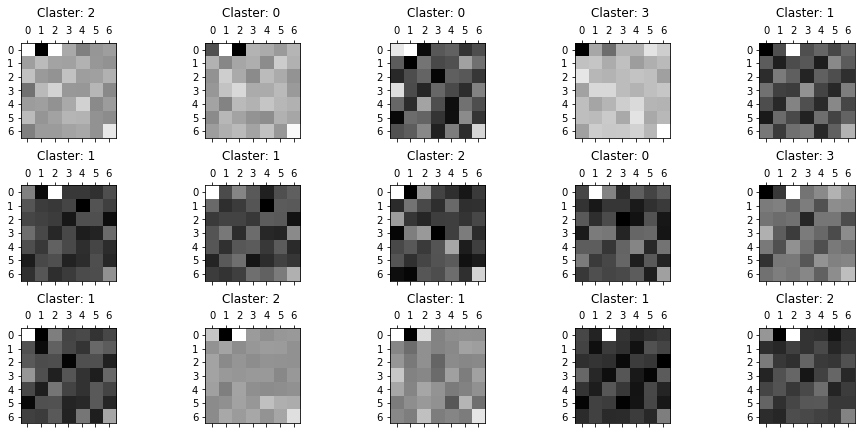

In [64]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Claster: {} \n".format(str(df.loc[rndperm[i],'y'])))
    vals = np.ones([49])
    vals[:-1] = df.loc[rndperm[i],feat_cols].values
    ax.matshow(vals.reshape((7,7)).astype(float))
    
plt.subplots_adjust(hspace = 0.5)
plt.show()

In [68]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.31623838 0.21164085 0.17877785]


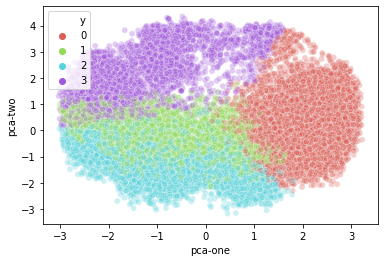

In [73]:
# plt.figure(figsize=(16,4))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 4),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

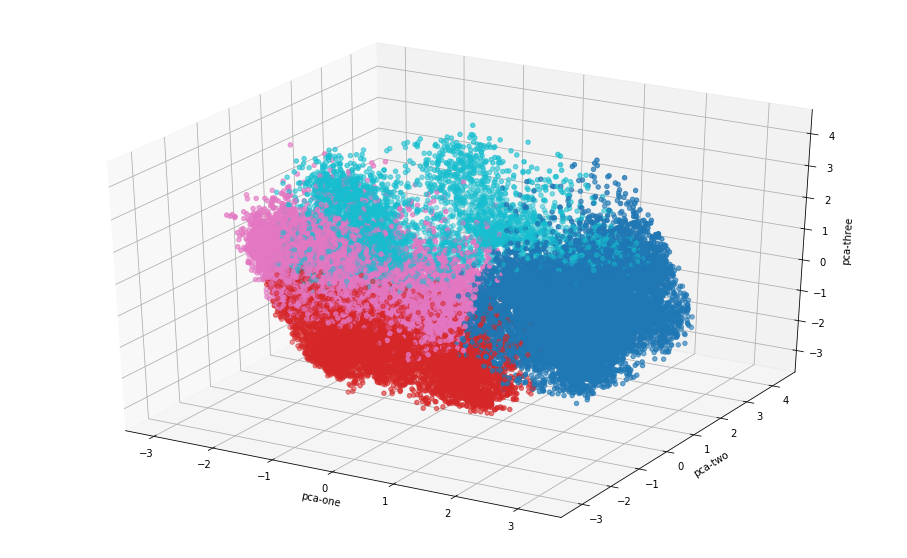

In [76]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [77]:
N = 10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.31716054 0.21067739 0.17826118]


In [78]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.015s...
[t-SNE] Computed neighbors for 10000 samples in 3.218s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.639863
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.483467
[t-SNE] KL divergence after 300 iterations: 2.819694
t-SNE done! Time elapsed:

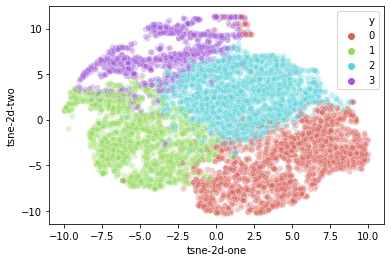

In [80]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
# plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 4),
    data=df_subset,
    legend="full",
    alpha=0.3
)

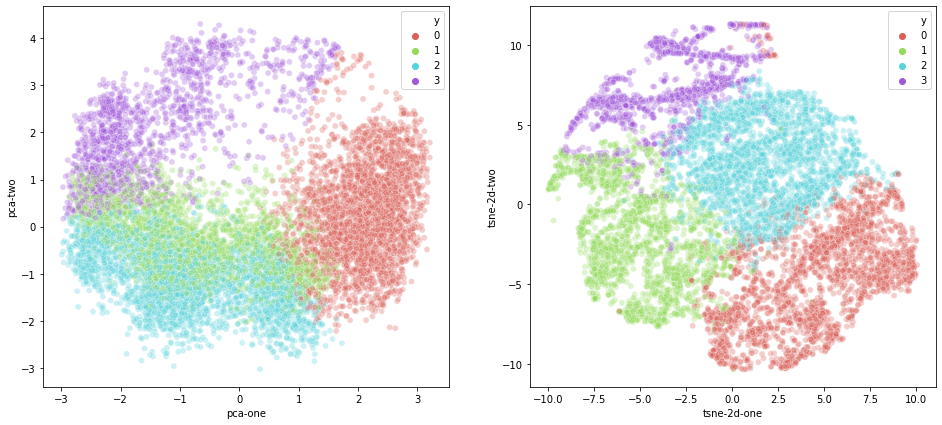

In [82]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 4),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 4),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [86]:
pca_30 = PCA(n_components=30)
pca_result_30 = pca_30.fit_transform(data_subset)
print('Cumulative explained variation for 30 principal components: {}'.format(np.sum(pca_30.explained_variance_ratio_)))

Cumulative explained variation for 30 principal components: 0.9952509590918923


In [89]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_30)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 29.36833882331848 seconds


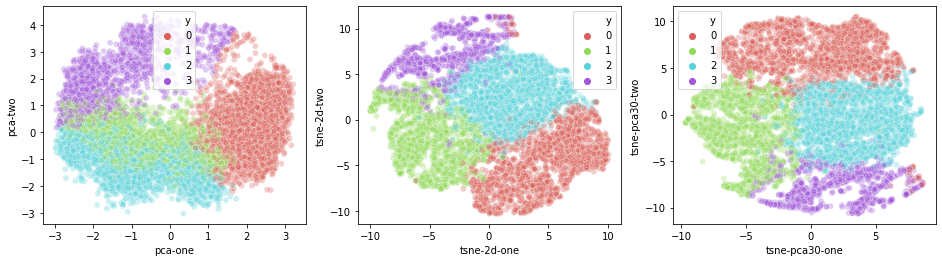

In [90]:
df_subset['tsne-pca30-one'] = tsne_pca_results[:,0]
df_subset['tsne-pca30-two'] = tsne_pca_results[:,1]
plt.figure(figsize=(16,4))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 4),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 4),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca30-one", y="tsne-pca30-two",
    hue="y",
    palette=sns.color_palette("hls", 4),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax3
)